In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

### 2.1.Когда использовать матричные операции вместо градиентного спуска в линейной регрессии

In [2]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')
    
def prepare_boston_data():
    data = load_boston()
    X, y = data['data'], data['target']
    # Нормализовать даннные с помощью стандартной нормализации
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

Прежде чем начать, обернем написанную нами линейную регрессию методом матричных операций в класс:

In [3]:
class LinRegAlgebra():
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y):
        self.theta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    def predict(self, X):
        return X.dot(self.theta)

Проведем замеры скорости работы алгоритмов на матричных операциях и на градиентном спуске. Предварительно найдем параметры для метода, основанного на градиентном спуске, так, чтобы значения метрик максимально совпадало со значениями в случае первого алгоритма.

In [4]:
X, y = prepare_boston_data()

In [5]:
linreg_alg = LinRegAlgebra()
linreg_alg.fit(X, y)
y_pred = linreg_alg.predict(X)

# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


In [6]:
class RegOptimizer():
    def __init__(self, alpha, n_iters):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    
    def gradient_step(self, theta, theta_grad):
        
        return theta - self._alpha * theta_grad 
     
    
    def grad_func(self, X, y, theta):
        raise NotImplementedError()

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        theta_mas=[]
        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)
            theta_mas.append(theta)            
            if np.max(abs(theta_grad))<=0.01:
                print (i)
                break
                
            #визуализируем шаги градиента
        theta_mas=np.array(theta_mas)
        plt.grid()
        plt.xlabel('Шаг')
        plt.ylabel('Значение градиента')
        plt.plot(range(len(theta_mas)), theta_mas, label='f(x)')
        print(f'Длина градиентного спуска: {len(theta_mas)}, Min theta_mas: {np.ndarray.min(abs(theta_mas))}')
        return theta     
                    
    
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)
        
    def predict(self, X):
        raise NotImplementedError()

In [7]:
class LinReg(RegOptimizer):
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(X.dot(theta) - y)
        
        
        return grad
    
    def predict(self, X):
        if self.theta is None:
            raise Exception('You should train the model first')
        
        y_pred = X.dot(self.theta)
        
        return y_pred

#### Задание 3.6.1
Сделайте для градиентного спуска остановку алгоритма, если максимальное из абсолютных значений компонент градиента становится меньше **0.01**. Сравните скорость обучения градиентным спуском и матричными операциями.

На какой итерации останавливается градиентный спуск?

212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
MSE = 21.90, RMSE = 4.68


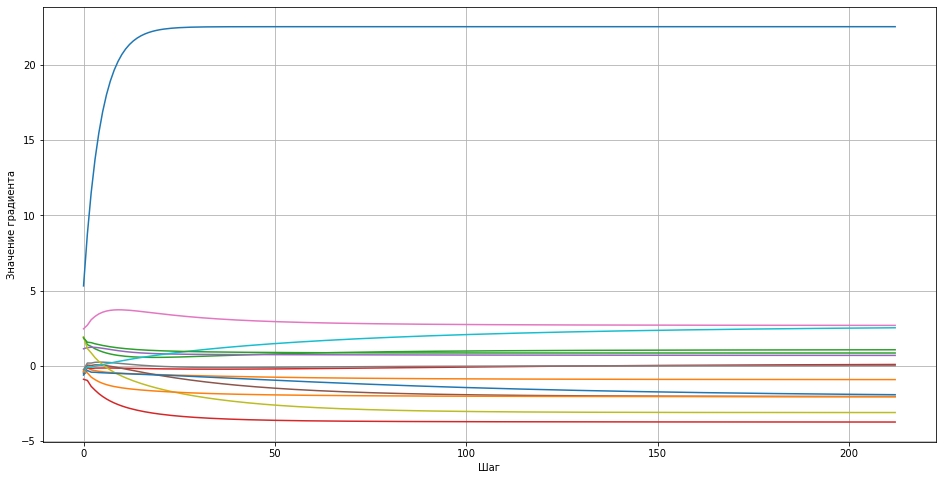

In [8]:
fig,ax = plt.subplots(figsize=(16,8))
linreg_crit = LinReg(0.2,5000)
linreg_crit.fit(X, y)
y_pred = linreg_crit.predict(X)

# Посчитать значение ошибок MSE и RMSE для тренировочных данных
print_regression_metrics(y, y_pred)

In [9]:
%timeit linreg_alg.fit(X, y)

67.7 µs ± 5.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05
212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368

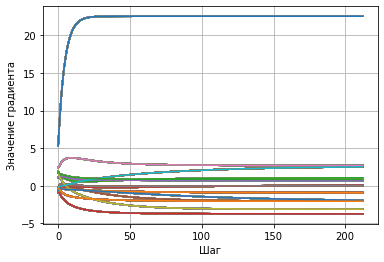

In [10]:
%timeit linreg_crit.fit(X, y)

212
Длина градиентного спуска: 213, Min theta_mas: 6.44206020368565e-05


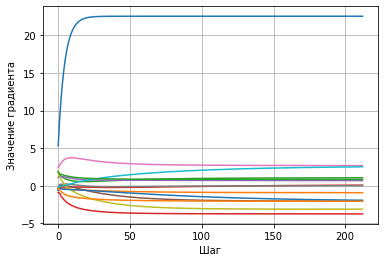

In [11]:

linreg_crit.fit(X, y)

Как видно из результатов эксперимента, реализация на матричных операциях опережает реализацию на градиентном спуске в 500 раз. Но всегда ли это так и какие подводные камни могут быть? Ниже приведен набор случаев, при которых версия с градентным спуском предпочтительнее:

1. Градиентный спуск работает быстрее в случае матриц с большим количеством признаков. Основная по сложности операция — нахождение обратной матрицы $(X^T X)^{-1}$.
1. Нахождение обратной матрицы может также потребовать больше оперативной памяти, что иногда является не приемлемым.
1. Матричные операции могут также проигрывать и в случае небольших объемов данных, но при плохой параллельной реализации или недостаточных ресурсах.
1. Градиентный спуск может быть усовершенствован до так называемого **стохастического градиентного спуска**, при котором данные для оптимизации подгружаются небольшими наборами, что уменьшает требования по памяти.
1. В некоторых случаях (например, в случае линейно-зависимых строк) алгебраический способ решения не будет работать совсем в виду невозможности найти обратную матрицу.

### 2.2. Превращение линейной модели в нелинейную

Нелинейные зависимости в данных встречаются намного чаще линейных. На самом деле простейшая линейная регрессия способна обнаруживать нелинейные зависимости. Для этого необходимо рассмотреть дополнительные признаки, полученные из исходных применением различных нелинейных функций. Возьмем уже знакомый датасет с ценами на квартиры в Бостоне и последовательно станем применять различные функции к исходным признакам:

Boston Data. Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per `$10000`
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

In [12]:
def prepare_boston_data_new():
    data = load_boston()
    X, y = data['data'], data['target']
    
    X = np.hstack([X, np.sqrt(X[:, 5:6]), X[:, 6:7] ** 3])
    
    # Нормализовать даннные с помощью стандартной нормализации
    #X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

Мы добавили два новых признака:
1. Взяли корень из признака RM (среднее число комнат на сожителя)
1. Возвели в куб значения признака AGE

Это только два примера. Всевозможных комбинаций признаков и примененных к ним функций неограниченное количество.

In [13]:
def train_validate(X, y):
    # Разбить данные на train/valid
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

    # Создать и обучить линейную регрессию
    linreg_alg = LinRegAlgebra()
    linreg_alg.fit(X_train, y_train)

    # Сделать предсказания по валидционной выборке
    y_pred = linreg_alg.predict(X_valid)

    # Посчитать значение ошибок MSE и RMSE для валидационных данных
    print_regression_metrics(y_valid, y_pred)

In [14]:
# Подготовить данные без модификации признаков
X, y = prepare_boston_data()
# Провести эксперимент
train_validate(X, y)

MSE = 23.38, RMSE = 4.84


In [15]:
# Подготовить данные без модификации признаков
X, y = prepare_boston_data_new()
# Провести эксперимент
train_validate(X, y)

MSE = 14.28, RMSE = 3.78


Как видно из результатов, мы добились улучшения точности предсказаний на 40%, всего лишь добавив пару нелинейных признаков в имеющимся. Можете поиграть с признаками и еще улучшить результат.

#### Задание 3.6.2
Добавьте к признакам нелинейной модели квадрат признака `DIS` и переобучите модель. Какой получился `RMSE`?
Ответ округлите до сотых, пример ввода: `5.55`